## Initialization

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the Dataset

In [ ]:
import requests
from textblob import TextBlob
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text
blob=TextBlob(data)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

## Getting the Word Frequencies

In [ ]:
items = blob.word_counts.items()

## Eliminating the Stop Words

In [ ]:
items = [item for item in items if item[0] not in stop_words]

## Sorting the Words by Frequency

In [ ]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

## Getting the Top 20 Words

In [ ]:
top20 = sorted_items[:20]

## Convert top20 to a DataFrame

In [ ]:
import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count']) 
df

,word,count
0,ham,337
1,lord,211
2,haue,175
3,king,173
4,shall,107
5,hamlet,106
6,come,106
7,thou,105
8,let,104
9,good,99


## Visualizing the DataFrame

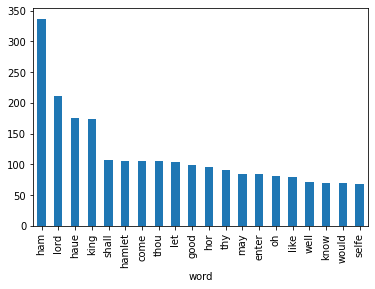

In [ ]:
df.plot.bar(x='word', y='count', legend=False)

## Loading the Mask Image that Specifies the Word Cloud’s Shape

In [ ]:
import imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

## Configuring the WordCloud Object

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

## Generating the Word Cloud

In [ ]:
wordcloud = wordcloud.generate(data)

## Displaying the Image with Matplotlib

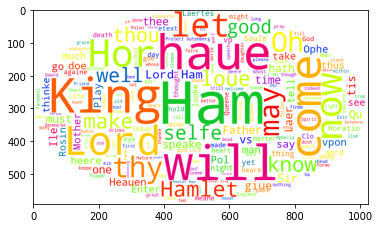

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)